<a href="https://colab.research.google.com/github/Zee3615/test/blob/master/Food_Recommender_draft2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**End product: food recomender** <br/>
Data set: kaggle 'nutrition facts for mcdonalds menu' <br/>
The recommendation algorithm should look at inputted food choices of a user. Let’s say they enter how many calories they want, serving size and fat. It
should be able to give out a suggestion. <br/>

In [2]:
# data set:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from sqlalchemy import create_engine
import warnings
import seaborn as sns
from scipy.stats.mstats import winsorize
from statistics import mode
import scipy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
import pandas as pd
df=pd.read_csv('gdrive/My Drive/food_recommend/data_file/menu.csv')

In [5]:
scipy.__version__

'1.4.1'

DATA EXPLORATION

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [7]:
df.head(2)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [9]:
df.loc[df['Category']=='Beverages'].head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
110,Beverages,Coca-Cola Classic (Small),16 fl oz cup,140,0,0.0,0,0.0,0,0.0,0,0,0,0,39,13,0,0,39,0,0,0,0,0
111,Beverages,Coca-Cola Classic (Medium),21 fl oz cup,200,0,0.0,0,0.0,0,0.0,0,0,5,0,55,18,0,0,55,0,0,0,0,0
112,Beverages,Coca-Cola Classic (Large),30 fl oz cup,280,0,0.0,0,0.0,0,0.0,0,0,5,0,76,25,0,0,76,0,0,0,0,0
113,Beverages,Coca-Cola Classic (Child),12 fl oz cup,100,0,0.0,0,0.0,0,0.0,0,0,0,0,28,9,0,0,28,0,0,0,0,0
114,Beverages,Diet Coke (Small),16 fl oz cup,0,0,0.0,0,0.0,0,0.0,0,0,10,0,0,0,0,0,0,0,0,0,0,0


In [10]:
df.loc[df['Category']=='Coffee & Tea'].head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
137,Coffee & Tea,Iced Tea (Small),16 fl oz cup,0,0,0.0,0,0.0,0,0.0,0,0,10,0,0,0,0,0,0,0,0,0,0,0
138,Coffee & Tea,Iced Tea (Medium),21 fl oz cup,0,0,0.0,0,0.0,0,0.0,0,0,10,0,0,0,0,0,0,0,0,0,0,0
139,Coffee & Tea,Iced Tea (Large),30 fl oz cup,0,0,0.0,0,0.0,0,0.0,0,0,15,1,0,0,0,0,0,0,0,0,0,0
140,Coffee & Tea,Iced Tea (Child),12 fl oz cup,0,0,0.0,0,0.0,0,0.0,0,0,5,0,0,0,0,0,0,0,0,0,0,0
141,Coffee & Tea,Sweet Tea (Small),16 fl oz cup,150,0,0.0,0,0.0,0,0.0,0,0,10,0,36,12,0,0,36,1,0,0,0,0


In [11]:
df.loc[df['Category']=='Smoothies & Shakes'].head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
232,Smoothies & Shakes,Blueberry Pomegranate Smoothie (Small),12 fl oz cup,220,5,0.5,1,0.0,0,0.0,5,1,40,2,50,17,3,12,44,2,0,2,6,2
233,Smoothies & Shakes,Blueberry Pomegranate Smoothie (Medium),16 fl oz cup,260,5,1.0,1,0.0,0,0.0,5,1,50,2,62,21,4,15,54,3,0,4,8,2
234,Smoothies & Shakes,Blueberry Pomegranate Smoothie (Large),22 fl oz cup,340,10,1.0,2,0.5,3,0.0,5,2,65,3,79,26,5,19,70,4,0,4,10,2
235,Smoothies & Shakes,Strawberry Banana Smoothie (Small),12 fl oz cup,210,5,0.5,1,0.0,0,0.0,5,1,50,2,47,16,3,10,44,3,0,30,8,2
236,Smoothies & Shakes,Strawberry Banana Smoothie (Medium),16 fl oz cup,250,5,1.0,1,0.0,0,0.0,5,1,60,2,58,19,3,13,54,4,0,35,8,4


In [12]:
import re

non_bev = ['Breakfast','Chicken & Fish','Beef & Pork','Snacks & Sides','Desserts','Salads']
bev = ['Coffee & Tea','Smoothies & Shakes','Beverages']

#df.loc[df['Category']=='Smoothies & Shakes'].head()

df['Serving_Size_(g)'] = " "
df['Serving_Size_(oz)'] = df['Serving Size']

for item in non_bev:
  df.loc[df['Category'] == item]
  df['Serving_Size_(oz)'] = df['Serving_Size_(oz)'].str.replace(r"\(.*\)"," ")
  df['Serving_Size_(oz)'] = df['Serving_Size_(oz)'].str.replace(r"oz"," ")
  df['Serving_Size_(oz)'] = df['Serving_Size_(oz)'].str.replace(r"cookie"," ")


for item in bev:
  df.loc[df['Category'] == item]
  df['Serving_Size_(oz)'] = df['Serving_Size_(oz)'].str.replace(r"fl cup"," ")
  df['Serving_Size_(oz)'] = df['Serving_Size_(oz)'].str.replace(r"carton"," ")
  df['Serving_Size_(oz)'] = df['Serving_Size_(oz)'].str.replace(r"fl"," ")
  df['Serving_Size_(oz)'] = df['Serving_Size_(oz)'].str.replace(r"cup"," ")

#rename Serving Size
#df = df.rename(columns={"Serving Size": "Serving Size (oz)"})
df
#df['Serving Size'] = df['Serving Size'].replace(regex=True,inplace=True,to_replace=r"oz",value=r'')

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving_Size_(g),Serving_Size_(oz)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15,,4.8
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8,,4.8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10,,3.9
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15,,5.7
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10,,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,45,14,280,12,80,27,1,4,64,12,15,0,40,8,,10.1
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,55,19,380,16,106,35,1,5,85,15,20,0,50,10,,13.4
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,30,9,190,8,53,18,1,2,43,8,10,0,25,6,,6.7
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,60,20,400,17,114,38,2,9,103,21,20,0,60,6,,14.2


In [13]:
#Convert series to float 
#cols = df.columns[df.dtypes.eq(object)]

df['Serving_Size_(oz)'] = pd.to_numeric(df['Serving_Size_(oz)'], errors='coerce')

#df['Serving Size'] = df['Serving Size'].apply(lambda x: float(x))

#Create gram column 

df ['Serving_Size_(g)'] = df['Serving_Size_(oz)']*28.3495
df['Serving Size'] = df['Serving Size']

df = df[['Category', 'Item', 'Serving Size','Serving_Size_(oz)', 'Serving_Size_(g)' ,'Calories',
       'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)',
       'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat',
       'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium',
       'Sodium (% Daily Value)', 'Carbohydrates',
       'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)']]

In [14]:
#pd.set_option('display.max_rows', None)

In [15]:
df

,Category,Item,Serving Size,Serving_Size_(oz),Serving_Size_(g),Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),4.8,136.07760,300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),4.8,136.07760,250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),3.9,110.56305,370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),5.7,161.59215,450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),5.7,161.59215,400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),10.1,286.32995,510,150,17.0,26,9.0,44,0.5,45,14,280,12,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),13.4,379.88330,690,200,23.0,35,12.0,58,1.0,55,19,380,16,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),6.7,189.94165,340,100,11.0,17,6.0,29,0.0,30,9,190,8,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),14.2,402.56290,810,290,32.0,50,15.0,76,1.0,60,20,400,17,114,38,2,9,103,21,20,0,60,6


In [16]:
df.loc[df['Category']=='Salads'].head()

,Category,Item,Serving Size,Serving_Size_(oz),Serving_Size_(g),Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
84,Salads,Premium Bacon Ranch Salad (without Chicken),7.9 oz (223 g),7.9,223.96105,140,70,7.0,11,3.5,18,0.0,25,9,300,13,10,3,3,12,4,9,170,30,15,6
85,Salads,Premium Bacon Ranch Salad with Crispy Chicken,9 oz (255 g),9.0,255.14550,380,190,21.0,33,6.0,29,0.0,70,23,860,36,22,7,2,10,5,25,100,25,15,8
86,Salads,Premium Bacon Ranch Salad with Grilled Chicken,8.5 oz (241 g),8.5,240.97075,220,80,8.0,13,4.0,20,0.0,85,29,690,29,8,3,2,10,4,29,110,30,15,8
87,Salads,Premium Southwest Salad (without Chicken),8.1 oz (230 g),8.1,229.63095,140,40,4.5,7,2.0,9,0.0,10,3,150,6,20,7,6,23,6,6,160,25,15,10
88,Salads,Premium Southwest Salad with Crispy Chicken,12.3 oz (348 g),12.3,348.69885,450,190,22.0,33,4.5,22,0.0,50,17,850,35,42,14,7,28,12,23,170,30,15,15


In [17]:
item_test =  'Premium Bacon Ranch Salad (without Chicken)'

item_cal_test = df.loc[df['Item'] == item_test, 'Calories'].iloc[0]
item_cal_test

140

In [18]:
cat = df['Category'].unique()
cnt =  len(cat)
items = df['Category'].value_counts()

print ("There are {} categries of meals in the dataset.".format(cnt))
print (" ")
print ("These are: \n {}".format(cat))
print (" ")
print ("The counts for each category are as follows : \n {}".format(items))

There are 9 categries of meals in the dataset.
 
These are: 
 ['Breakfast' 'Beef & Pork' 'Chicken & Fish' 'Salads' 'Snacks & Sides'
 'Desserts' 'Beverages' 'Coffee & Tea' 'Smoothies & Shakes']
 
The counts for each category are as follows : 
 Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Beverages             27
Chicken & Fish        27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64


In [19]:
df['Category'] = df['Category'].replace(['Beef & Pork', 'Coffee & Tea','Smoothies & Shakes', 'Chicken & Fish', 'Snacks & Sides'],
                                        ['Beef_and_Pork', 'Coffee_and_Tea','Smoothies_and_Shakes', 'Chicken_and_Fish', 'Snacks_and_Sides'])

items = df['Category'].value_counts()
items

Coffee_and_Tea          95
Breakfast               42
Smoothies_and_Shakes    28
Chicken_and_Fish        27
Beverages               27
Beef_and_Pork           15
Snacks_and_Sides        13
Desserts                 7
Salads                   6
Name: Category, dtype: int64

In [20]:
df.describe()

,Serving_Size_(oz),Serving_Size_(g),Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,12.803077,362.960829,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,20.676923,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,7.054481,199.991014,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,24.034954,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,1.000000,28.349500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.775000,192.067862,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,4.750000,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,12.000000,340.194000,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,16.000000,453.592000,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,36.250000,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,32.000000,907.184000,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,150.000000,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


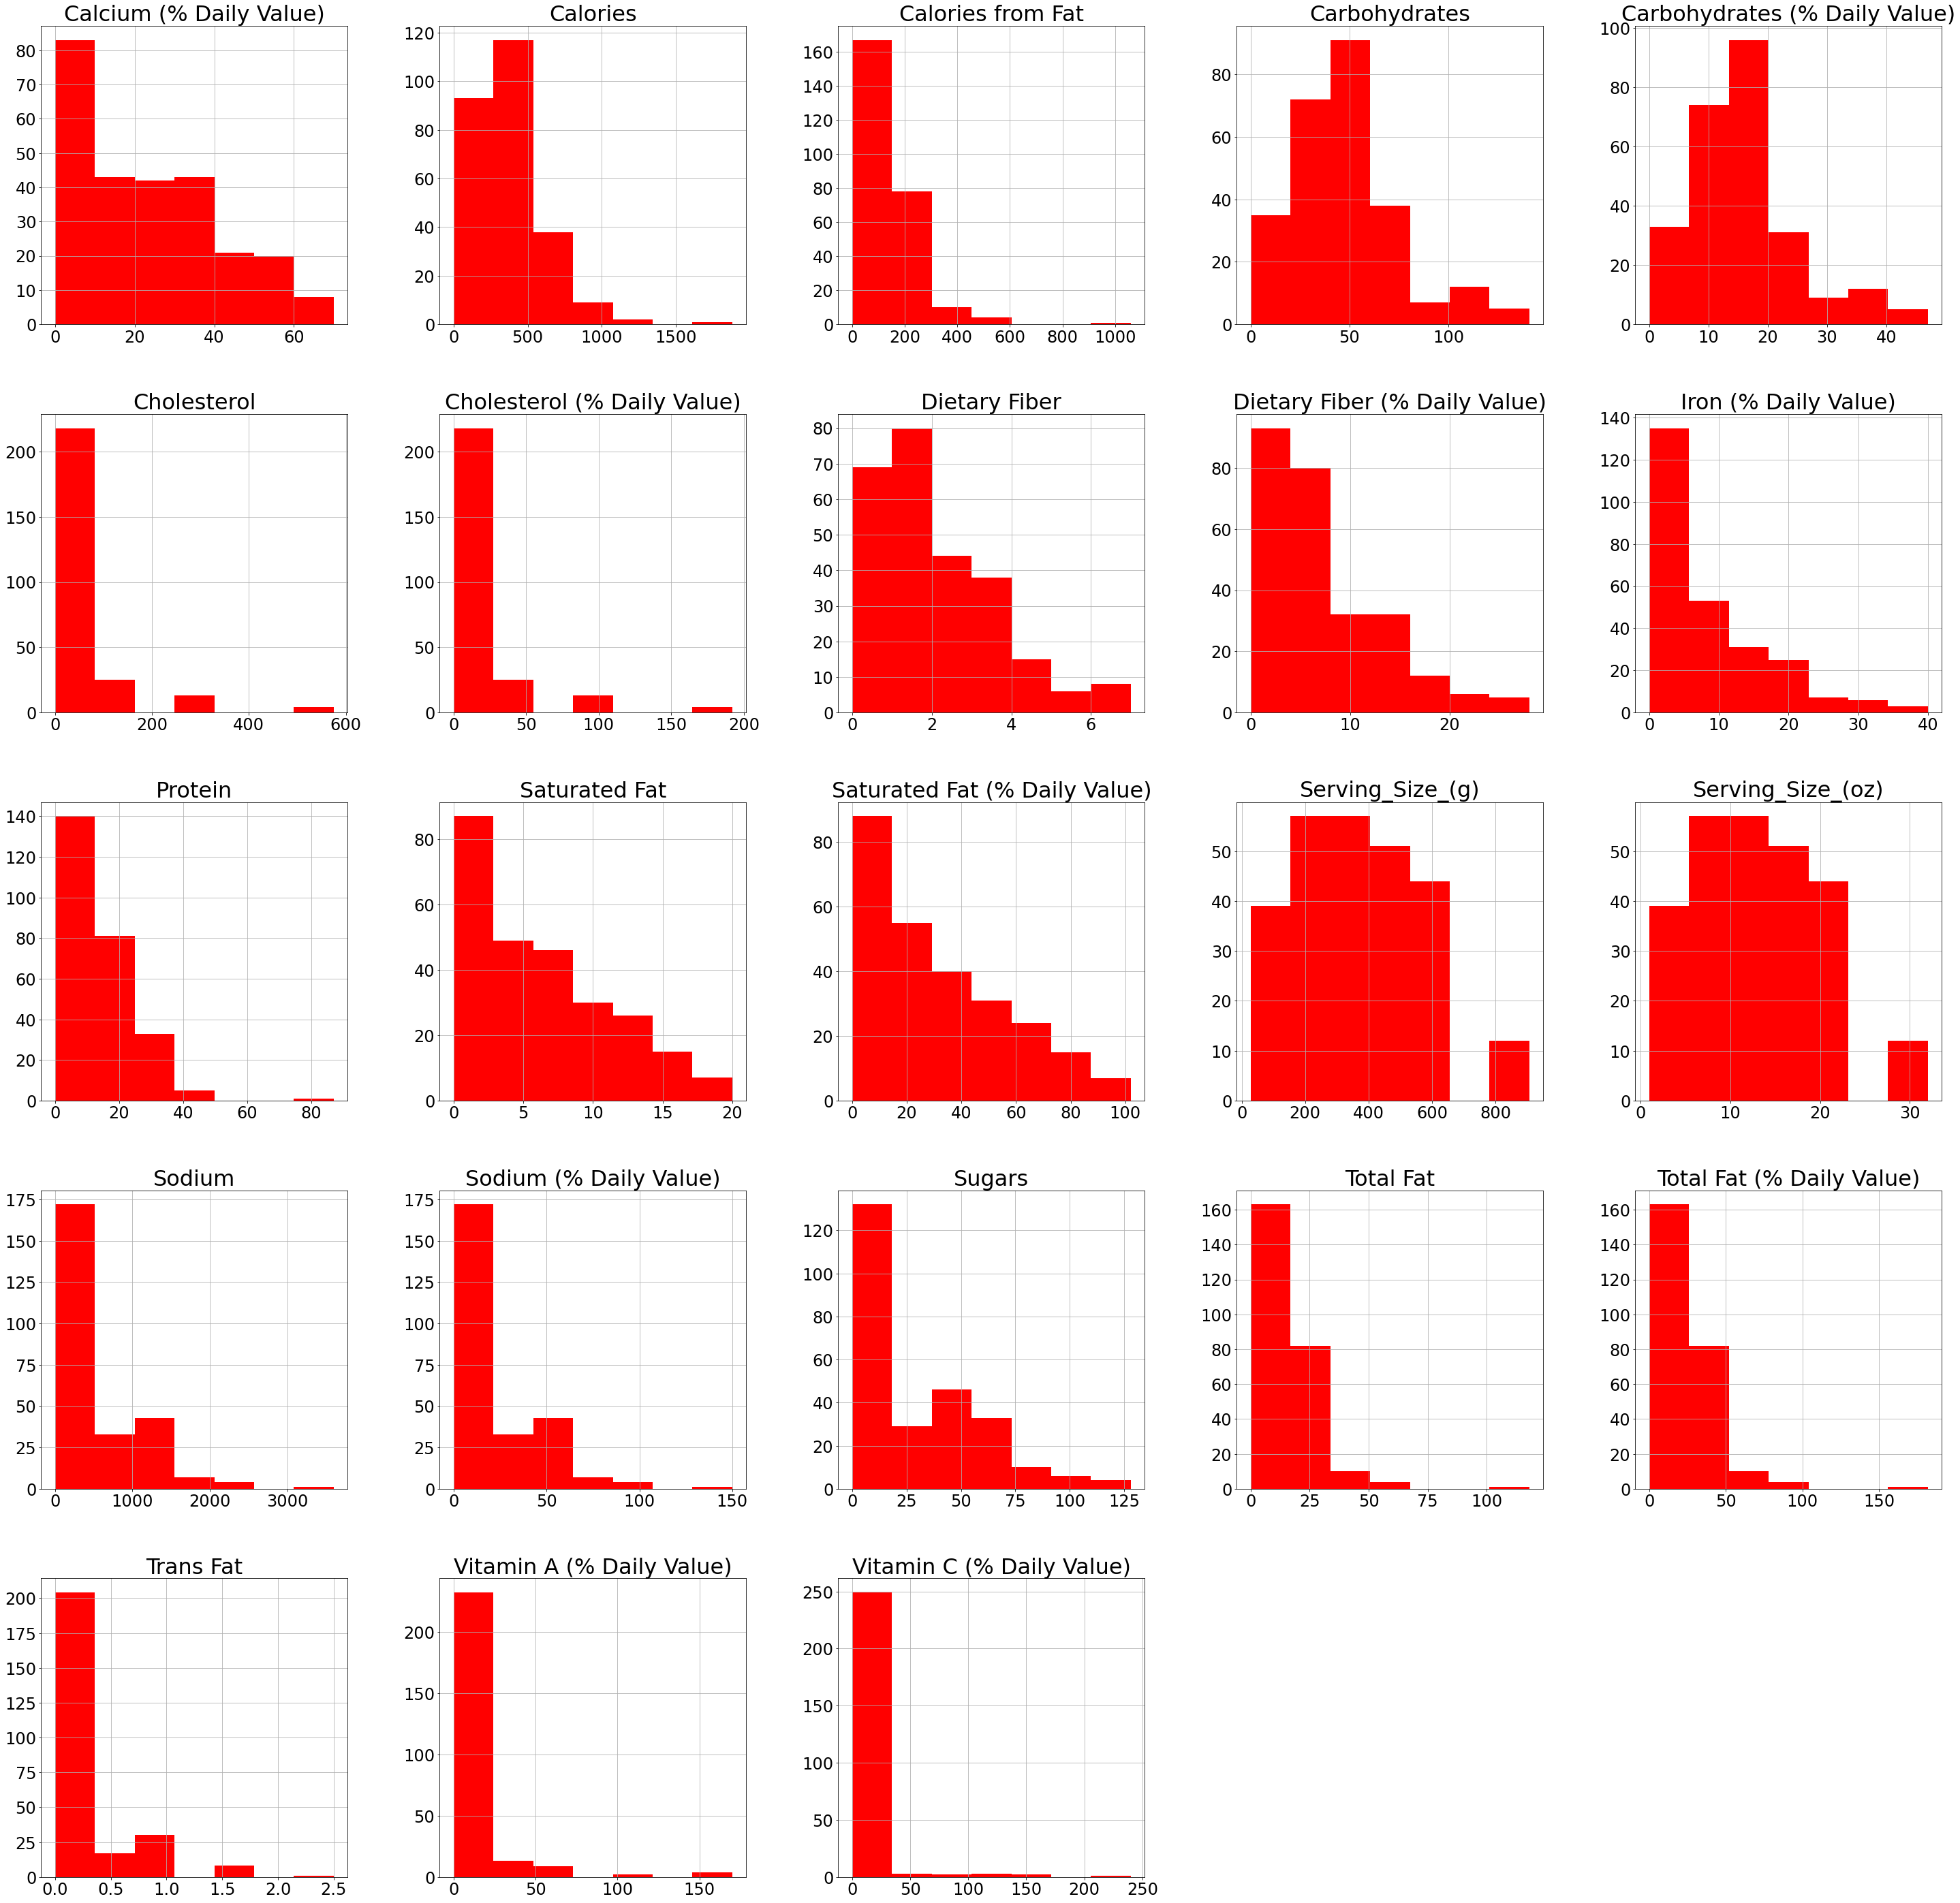

In [21]:
import matplotlib
params = {'axes.titlesize':'32',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
matplotlib.rcParams.update(params)
all_hist = df.hist(bins=7, figsize=(50,50), color = 'red')
plt.show()

In [22]:
df.columns

Index(['Category', 'Item', 'Serving Size', 'Serving_Size_(oz)',
       'Serving_Size_(g)', 'Calories', 'Calories from Fat', 'Total Fat',
       'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

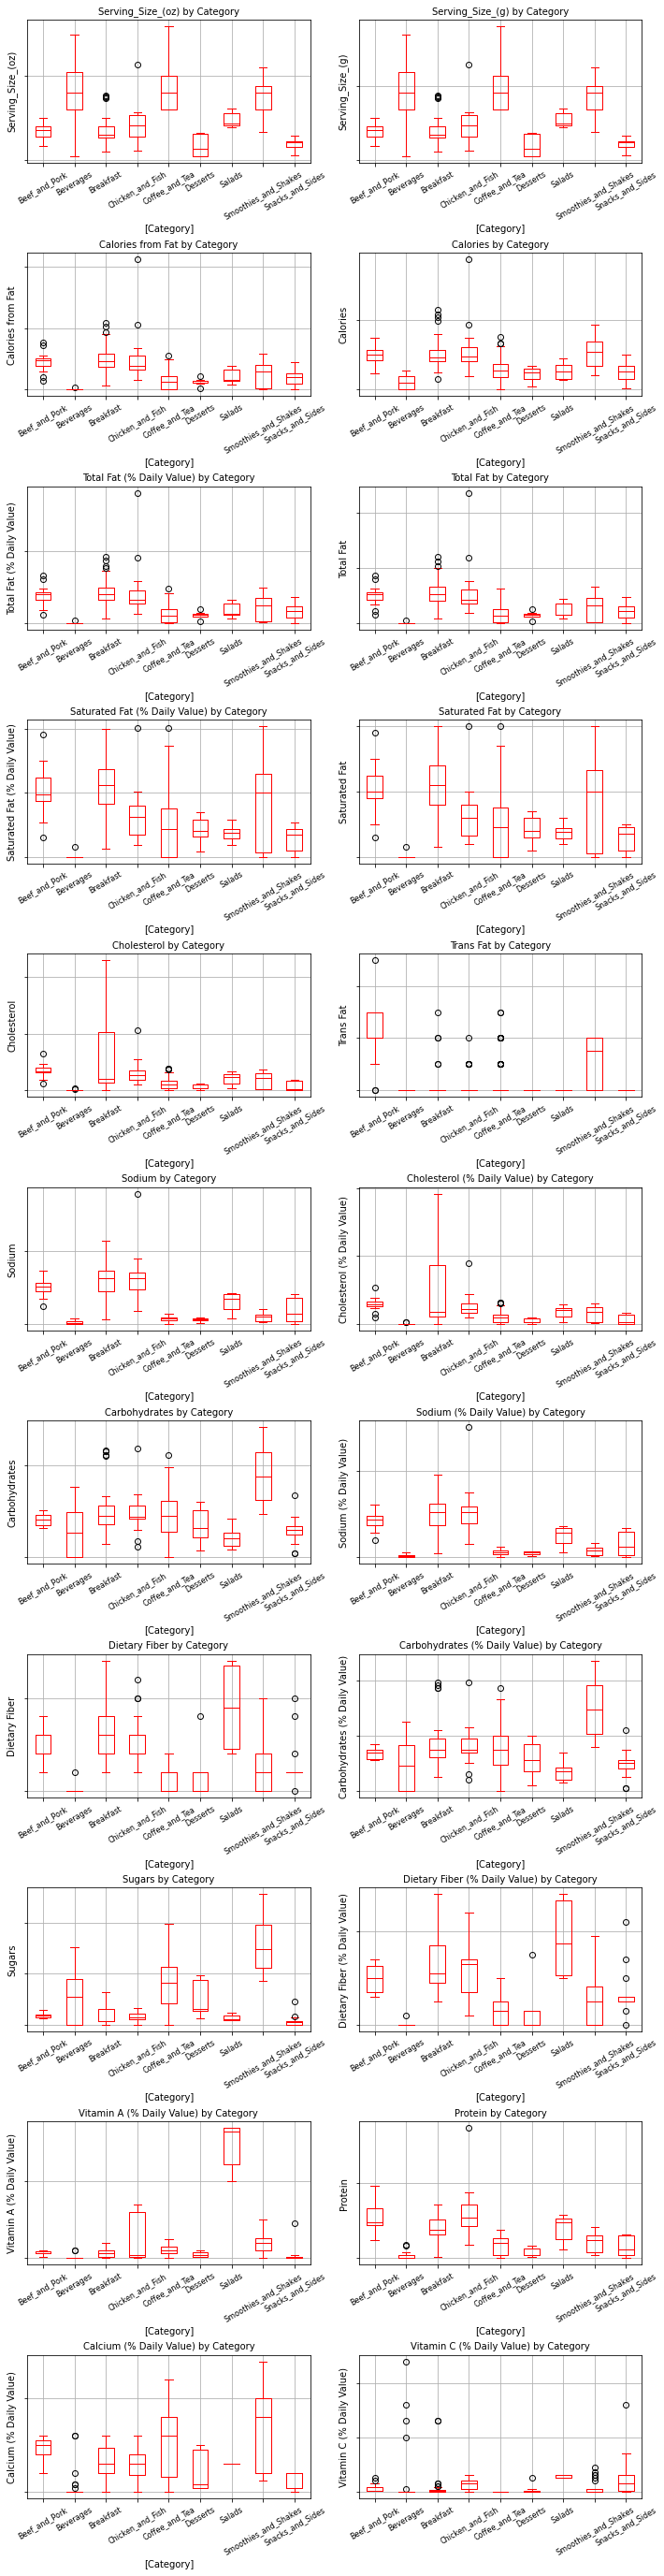

In [23]:

#numpy array with ax[row_idx, col_idx]
fig, ax = plt.subplots(11, 2, figsize=(10,40))

for i,column in enumerate(df.columns[3:]):
     if i <= 1: #if column index is less than 3, put these graphs in row 0 col i
        #sns.boxplot(x=df[column],ax=ax[0,i])
        plt_x = df.boxplot(column= column, by=['Category'], color = 'red',ax=ax[0,i])
        plt_x.set_title(column + " by Category", fontsize=10)
        plt_x.get_figure().suptitle('')
        plt_x.set_ylabel(column, fontsize=10)
        ##plt_x.set_xlabel("Category", fontsize=10)
        plt_x.get_figure().gca().set_xlabel("")
        plt_x.set_xticklabels(plt_x.get_xticklabels(),rotation=30, fontsize=8)
        plt_x.set_yticklabels(plt_x.get_yticklabels(),rotation=0, fontsize=8)
     elif i>=2 and i<=3:
        plt_x = df.boxplot(column= column, by=['Category'], color = 'red',ax=ax[1,i-3])
        plt_x.set_title(column + " by Category", fontsize=10)
        plt_x.get_figure().suptitle('')
        plt_x.set_ylabel(column, fontsize=10)
        plt_x.get_figure().gca().set_xlabel("")
        plt_x.set_xticklabels(plt_x.get_xticklabels(),rotation=30, fontsize=8)
        plt_x.set_yticklabels(plt_x.get_yticklabels(),rotation=0, fontsize=8)
     elif i>=4 and i<=5:
        plt_x = df.boxplot(column= column, by=['Category'], color = 'red',ax=ax[2,i-5])
        plt_x.set_title(column + " by Category", fontsize=10)
        plt_x.get_figure().suptitle('')
        plt_x.set_ylabel(column, fontsize=10)
        plt_x.get_figure().gca().set_xlabel("")
        plt_x.set_xticklabels(plt_x.get_xticklabels(),rotation=30, fontsize=8)
        plt_x.set_yticklabels(plt_x.get_yticklabels(),rotation=0, fontsize=8) 
     elif i>=6 and i<=7:
        plt_x = df.boxplot(column= column, by=['Category'], color = 'red',ax=ax[3,i-7])
        plt_x.set_title(column + " by Category", fontsize=10)
        plt_x.get_figure().suptitle('')
        plt_x.set_ylabel(column, fontsize=10)
        plt_x.get_figure().gca().set_xlabel("")
        plt_x.set_xticklabels(plt_x.get_xticklabels(),rotation=30, fontsize=8)
        plt_x.set_yticklabels(plt_x.get_yticklabels(),rotation=0, fontsize=8) 
     elif i>=8 and i<=9:
        plt_x = df.boxplot(column= column, by=['Category'], color = 'red',ax=ax[4,i-9])
        plt_x.set_title(column + " by Category", fontsize=10)
        plt_x.get_figure().suptitle('')
        plt_x.set_ylabel(column, fontsize=10)
        plt_x.get_figure().gca().set_xlabel("")
        plt_x.set_xticklabels(plt_x.get_xticklabels(),rotation=30, fontsize=8)
        plt_x.set_yticklabels(plt_x.get_yticklabels(),rotation=0, fontsize=8) 
     elif i>=10 and i<=11:
        plt_x = df.boxplot(column= column, by=['Category'], color = 'red',ax=ax[5,i-11])
        plt_x.set_title(column + " by Category", fontsize=10)
        plt_x.get_figure().suptitle('')
        plt_x.set_ylabel(column, fontsize=10)
        plt_x.get_figure().gca().set_xlabel("")
        plt_x.set_xticklabels(plt_x.get_xticklabels(),rotation=30, fontsize=8)
        plt_x.set_yticklabels(plt_x.get_yticklabels(),rotation=0, fontsize=8)
     elif i>=12 and i<=13:
        plt_x = df.boxplot(column= column, by=['Category'], color = 'red',ax=ax[6,i-13])
        plt_x.set_title(column + " by Category", fontsize=10)
        plt_x.get_figure().suptitle('')
        plt_x.set_ylabel(column, fontsize=10)
        plt_x.get_figure().gca().set_xlabel("")
        plt_x.set_xticklabels(plt_x.get_xticklabels(),rotation=30, fontsize=8)
        plt_x.set_yticklabels(plt_x.get_yticklabels(),rotation=0, fontsize=8)
     elif i>=14 and i<=15:
        plt_x = df.boxplot(column= column, by=['Category'], color = 'red',ax=ax[7,i-15])
        plt_x.set_title(column + " by Category", fontsize=10)
        plt_x.get_figure().suptitle('')
        plt_x.set_ylabel(column, fontsize=10)
        plt_x.get_figure().gca().set_xlabel("")
        plt_x.set_xticklabels(plt_x.get_xticklabels(),rotation=30, fontsize=8)
        plt_x.set_yticklabels(plt_x.get_yticklabels(),rotation=0, fontsize=8)
     elif i>=16 and i<=17:
        plt_x = df.boxplot(column= column, by=['Category'], color = 'red',ax=ax[8,i-17])
        plt_x.set_title(column + " by Category", fontsize=10)
        plt_x.get_figure().suptitle('')
        plt_x.set_ylabel(column, fontsize=10)
        plt_x.get_figure().gca().set_xlabel("")
        plt_x.set_xticklabels(plt_x.get_xticklabels(),rotation=30, fontsize=8)
        plt_x.set_yticklabels(plt_x.get_yticklabels(),rotation=0, fontsize=8)
     elif i>=18 and i<=19:
        plt_x = df.boxplot(column= column, by=['Category'], color = 'red',ax=ax[9,i-19])
        plt_x.set_title(column + " by Category", fontsize=10)
        plt_x.get_figure().suptitle('')
        plt_x.set_ylabel(column, fontsize=10)
        plt_x.get_figure().gca().set_xlabel("")
        plt_x.set_xticklabels(plt_x.get_xticklabels(),rotation=30, fontsize=8)
        plt_x.set_yticklabels(plt_x.get_yticklabels(),rotation=0, fontsize=8)
     elif i>=20 and i<=21:
        plt_x = df.boxplot(column= column, by=['Category'], color = 'red',ax=ax[10,i-21])
        plt_x.set_title(column + " by Category", fontsize=10)
        plt_x.get_figure().suptitle('')
        plt_x.set_ylabel(column, fontsize=10)
        plt_x.get_figure().gca().set_xlabel("")
        plt_x.set_xticklabels(plt_x.get_xticklabels(),rotation=30, fontsize=8)
        plt_x.set_yticklabels(plt_x.get_yticklabels(),rotation=0, fontsize=8)


  #for t in plt.texts:
    #t.set_visible(False)

#fig.suptitle('Categories', fontsize = 20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()
plt.clf()
plt.close()

**Recommender Potential Questions** <br/>

1- Ask about Category <br/>
2- Ask about Calories <br/>
3- Ask about Trans Fat <br/>
4- Ask about Sodium <br/>
5- Ask about Carbohydrates <br/>
6- Ask about Dietary Fibres <br/>
7- Ask about Protein <br/>
8- Ask about Sugars <br/>
9- Ask about Vitamin C <br/>
10- Ask about Vitamin A <br/>
11- Ask about Iron <br/>
12- Ask about Calcium <br/>


**TRIAL 1: Content-based Filtering, Find meals based on your favourite meal at McDonalds**


In [24]:
from sklearn.neighbors import NearestNeighbors                                  # KNN Clustering 
from scipy.sparse import csr_matrix                                             # Compressed Sparse Row matrix
from sklearn.decomposition import TruncatedSVD                                  # Dimensional Reduction

In [25]:
df.columns

Index(['Category', 'Item', 'Serving Size', 'Serving_Size_(oz)',
       'Serving_Size_(g)', 'Calories', 'Calories from Fat', 'Total Fat',
       'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

In [26]:
df.head(2)

,Category,Item,Serving Size,Serving_Size_(oz),Serving_Size_(g),Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),4.8,136.0776,300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),4.8,136.0776,250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8


In [27]:
col = ['Item','Category','Calories', 'Calories from Fat', 'Serving_Size_(oz)', 'Serving_Size_(g)',
       'Total Fat', 'Total Fat (% Daily Value)',
       'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat',
       'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium',
       'Sodium (% Daily Value)', 'Carbohydrates',
       'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)']

df1 = df[col]
df1 = df1.dropna(axis=0)
#df1 = df1.drop_duplicates() 

df_pivot = df1.pivot(index='Item', 
                     columns = 'Category', 
                     values = ['Calories', 'Calories from Fat','Serving_Size_(oz)', 
                               'Serving_Size_(g)','Total Fat', 'Total Fat (% Daily Value)',
                               'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat',
                               'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium',
                               'Sodium (% Daily Value)', 'Carbohydrates','Carbohydrates (% Daily Value)', 
                               'Dietary Fiber','Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
                               'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
                               'Calcium (% Daily Value)', 'Iron (% Daily Value)']).fillna(0)
df_pivot_matrix = csr_matrix(df_pivot)

In [28]:
df_pivot_matrix

<260x207 sparse matrix of type '<class 'numpy.float64'>'
	with 4807 stored elements in Compressed Sparse Row format>

In [29]:
df_pivot.head(2)

Calories  ... Iron (% Daily Value)
Category            Beef_and_Pork  ...     Snacks_and_Sides
Item                               ...                     
1% Low Fat Milk Jug           0.0  ...                  0.0
Apple Slices                  0.0  ...                  0.0

[2 rows x 207 columns]

In [30]:
all_items = list(df_pivot.index)
all_items[70]
#index = all_items.index('Apple Slices')
#index

'Double Quarter Pounder with Cheese'

In [31]:
knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(df_pivot_matrix)

In [32]:
#item_test =  'Premium Bacon Ranch Salad (without Chicken)'

#item_cal_test = df.loc[df['Item'] == item_test, 'Calories'].iloc[0]
#item_cal_test

n_recomm = (int(input('How many recommendations would you like? ')))            # you can enter the number of recommendations you want 
item = input('What is your favourite meal? ')                                   # this gives recommendations based on favourite meal

all_items = list(df_pivot.index)
indx = all_items.index(item)

print(" ")
print("for verification only {} , Item Number {}".format(item,indx))
print(" ")
print("I found {} recommendations for you! ".format(n_recomm))
print(" ")

distance, indice = model_knn.kneighbors(df_pivot.iloc[indx].values.reshape(1,-1), n_neighbors= n_recomm)
for i in range(0, len(distance.flatten())):
  if  i == 0:
    first_match = df_pivot.index[indx]
    cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
    
    print('Your favourite meal is {0}, which contains {1} calories.'.format(first_match, cal_first_match))
    print(" ")
    print('You might also enjoy:')
    print(" ")
  else:
    item_in_loop = df_pivot.index[indice.flatten()[i]]
    cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
    distance_item_in_loop = distance.flatten()[i]
    
    print('{0} -  {1}, which has {2} Calories, (with distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))

    #print (indice.flatten()[i])
    #print(df_pivot.index[indice.flatten()[i]])
    #print ("Calorie count:",cal_item_in_loop)

print('\n')
#print (distance)
#print(indice)


How many recommendations would you like? 5
What is your favourite meal? Apple Slices
 
for verification only Apple Slices , Item Number 1
 
I found 5 recommendations for you! 
 
Your favourite meal is Apple Slices, which contains 15 calories.
 
You might also enjoy:
 
1 -  Side Salad, which has 20 Calories, (with distance: 0.5745986182353495)
2 -  Fruit 'n Yogurt Parfait, which has 150 Calories, (with distance: 0.7349294259639314)
3 -  Large French Fries, which has 510 Calories, (with distance: 0.7704420727632741)
4 -  Medium French Fries, which has 340 Calories, (with distance: 0.7724237977189345)




 TRIAL 2 : CONTENT-BASED FILTERING BASED ON CATEGORY + CALORIE COUNT 

In [33]:
all_cal = list(df_pivot.Calories.Breakfast)
print(all_cal[:10])
#indx_c = all_cal.index(620.0)
#print(indx_c)

number = float(input("enter number"))

closest = min(all_cal, key=lambda x:abs(x-number))

indx_app = all_cal.index(closest)

print (indx_app)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 620.0, 570.0]
enter number600
8


In [34]:
n_recomm = (int(input('How many recommendations would you like? ')))             # you can enter the number of recommendations you want 
print(" ")
cat1 = input("Which Category would you like? ")                                  #enter calories 
print(" ")
calorie= float(input('How many calories would you like in the meal? '))          #enter number of calories 



if cat1=='Breakfast':
  all_cal = list(df_pivot.Calories.Breakfast)                                    #get the calories by category by making that column into a list
  closest = min(all_cal, key=lambda x:abs(x-calorie))                            #find the number closest to the inputted calorie count
  indx_c = all_cal.index(closest)                                                #find the index of the closest number to that 
  #test = df.loc[df.index == indx_c, 'Item'].iloc[0]

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)  #apply knn based on input 

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]                                       #top match with the index number found on top 
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]    #the number of calories of the first match
      distance_first_match = distance.flatten()[i]                               #distance first match 
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n')

elif cat1=="Salads":
  all_cal = list(df_pivot.Calories.Salads)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  indx_c = all_cal.index(closest)

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n') 

elif cat1=="Beef_and_Pork":
  all_cal = list(df_pivot.Calories.Beef_and_Pork)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  indx_c = all_cal.index(closest)

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n')

elif cat1=="Chicken_and_Fish":
  all_cal = list(df_pivot.Calories.Chicken_and_Fish)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  indx_c = all_cal.index(closest)

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n')

elif cat1=="Beverages":
  all_cal = list(df_pivot.Calories.Beverages)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  indx_c = all_cal.index(closest)

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n')

elif cat1=="Coffee_and_Tea":
  all_cal = list(df_pivot.Calories.Coffee_and_Tea)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  indx_c = all_cal.index(closest)

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n')

elif cat1=="Smoothies_and_Shakes":
  all_cal = list(df_pivot.Calories.Smoothies_and_Shakes)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  indx_c = all_cal.index(closest)

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n')

elif cat1=="Desserts":
  all_cal = list(df_pivot.Calories.Desserts)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  indx_c = all_cal.index(closest)

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n')

elif cat1=="Snacks_and_Sides":
  all_cal = list(df_pivot.Calories.Snacks_and_Sides)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  indx_c = all_cal.index(closest)

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n')

else:
  print("Sorry, not a valid entry! Try again")

How many recommendations would you like? 3
 
Which Category would you like? Breakfast
 
How many calories would you like in the meal? 500
 
You want an item from the Breakfast menu, which contains around 500.0 Calories.
 
I found 3 recommendations for you!
 
The best match is Sausage, Egg & Cheese McGriddles with Egg Whites, which contains 500 calories (distance 0.0).
 
You might also enjoy:
 
1 -  Bacon, Egg & Cheese Bagel with Egg Whites, which has 570 Calories, (distance: 0.00043585544373325735)
2 -  Sausage McGriddles, which has 420 Calories, (distance: 0.0006546336197237324)




In [35]:
type(calorie)

float

With choices:

In [36]:
print("Welcome to the McDonald's Recommender!!!\nFor each of the following questions, make a choice and type in the corresponding number!")
print(" ")

print ("1.Breakfast\n2.Chicken & Fish\n3.Beef & Pork\n4.Snacks & Sides\n5.Salads\n6.Beverages\n7.Coffee & Tea\n8.Smoothies &Shakes\n9.Desserts")
cat1 = input("Which Category would you like? ")#enter calories 
if cat1=="1":
  cat1 ='Breakfast'
elif cat1=="2":
  cat1 ='Chicken_and_Fish' 
elif cat1=="3":
  cat1 = 'Beef_and_Pork' 
elif cat1=="4":
  cat1 = 'Snacks_and_Sides'
elif cat1 =="5":
  cat1 = 'Salads'
elif cat1 =="6":
  cat1 = 'Beverages'
elif cat1 =="7":
  cat1 = 'Coffee_and_Tea'
elif cat1 =="8":
  cat1 = 'Smoothies_and_Shakes'
elif cat1 =="9":
  cat1 = 'Desserts'
print (" ")

print ("1.50\n2.100\n3.250\n4.500\n5.1000\n6.1500\n7.2000")
calorie= input('How many calories would you like in the meal? ') #enter number of calories 
if calorie=="1":
  calorie = 50.0
elif calorie=="2":
  calorie = 100.0
elif calorie=="3":
  calorie = 250.0 
elif calorie=="4":
  calorie = 500.0
elif calorie =="5":
  calorie = 1000.0
elif calorie =="6":
  calorie = 1500.0
elif calorie =="7":
  calorie = 2000.0
print(" ")

print ("1.One\n2.Two\n3.Three\n4.Four\n5.Five")
n_recomm = (int(input('How many recommendations would you like? ')))  # you can enter the number of recommendations you want 
print(" ")


if cat1=='Breakfast':
  all_cal = list(df_pivot.Calories.Breakfast)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  indx_c = all_cal.index(closest)
  #test = df.loc[df.index == indx_c, 'Item'].iloc[0]

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n')

elif cat1=="Salads":
  all_cal = list(df_pivot.Calories.Salads)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  indx_c = all_cal.index(closest)

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n') 

elif cat1=="Beef_and_Pork":
  all_cal = list(df_pivot.Calories.Beef_and_Pork)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  indx_c = all_cal.index(closest)

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n')

elif cat1=="Chicken_and_Fish":
  all_cal = list(df_pivot.Calories.Chicken_and_Fish)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  indx_c = all_cal.index(closest)

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n')

elif cat1=="Beverages":
  all_cal = list(df_pivot.Calories.Beverages)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  indx_c = all_cal.index(closest)

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n')

elif cat1=="Coffee_and_Tea":
  all_cal = list(df_pivot.Calories.Coffee_and_Tea)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  indx_c = all_cal.index(closest)

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n')

elif cat1=="Smoothies_and_Shakes":
  all_cal = list(df_pivot.Calories.Smoothies_and_Shakes)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  indx_c = all_cal.index(closest)

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n')

elif cat1=="Desserts":
  all_cal = list(df_pivot.Calories.Desserts)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  indx_c = all_cal.index(closest)

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n')

elif cat1=="Snacks_and_Sides":
  all_cal = list(df_pivot.Calories.Snacks_and_Sides)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  indx_c = all_cal.index(closest)

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n')

else:
  print("Sorry, not a valid entry! Try again")

Welcome to the McDonald's Recommender!!!
For each of the following questions, make a choice and type in the corresponding number!
 
1.Breakfast
2.Chicken & Fish
3.Beef & Pork
4.Snacks & Sides
5.Salads
6.Beverages
7.Coffee & Tea
8.Smoothies &Shakes
9.Desserts
Which Category would you like? 3
 
1.50
2.100
3.250
4.500
5.1000
6.1500
7.2000
How many calories would you like in the meal? 5
 
1.One
2.Two
3.Three
4.Four
5.Five
How many recommendations would you like? 5
 
 
You want an item from the Beef_and_Pork menu, which contains around 1000.0 Calories.
 
I found 5 recommendations for you!
 
The best match is Double Quarter Pounder with Cheese, which contains 750 calories (distance 3.3306690738754696e-16).
 
You might also enjoy:
 
1 -  Daily Double, which has 430 Calories, (distance: 0.001085095684645987)
2 -  Quarter Pounder Deluxe, which has 540 Calories, (distance: 0.0016550523084242208)
3 -  Big Mac, which has 530 Calories, (distance: 0.0017084014034226547)
4 -  Quarter Pounder with Bac

In [ ]:
type(calorie)

float

**TRIAL 3: CONTENT-BASED FILTERING WITH CATEGORY + CALORIE + FAT CONENT**

**EXTRANEOUS**